# Logistic Regression (Model & Predict)

## 1) Bike Sharing

##### - hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
##### - day.csv - bike sharing counts aggregated on daily basis. Records: 731 days
##### - Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
df_d = pd.read_csv('day.csv')
df_h = pd.read_csv('hour.csv')

In [67]:
df_d.head(1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [68]:
df_h.head(1)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16


In [69]:
df_d.shape

(731, 16)

In [70]:
df_h.shape

(17379, 17)

In [71]:
df_h.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [72]:
df_h.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [73]:
from datetime import datetime

In [74]:
df_h["date"] = df_h.dteday.apply(lambda x : x.split()[0].split("-")[2])
#Converting cnt as low or high demand
bins=[1,100,1000]
df_h['cnt_lh'] = pd.cut(df_h['cnt'], bins=bins, labels=[0,1], include_lowest=True)

In [75]:
df_h.cnt_lh.value_counts()

1    10344
0     7035
Name: cnt_lh, dtype: int64

In [76]:
# class balance by combining to the nearest class
df_h['cnt_lh'] = df_h.cnt_lh.replace({3: 1, 6: 5})

In [77]:
df_h.cnt_lh.value_counts()

1    10344
0     7035
Name: cnt_lh, dtype: int64

In [78]:
# class balance by combining to the nearest class
df_h['cnt_lh'] = df_h.cnt_lh.replace({5:4})

In [79]:
df_h.cnt_lh.value_counts()

1    10344
0     7035
Name: cnt_lh, dtype: int64

In [80]:
df_h.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'date', 'cnt_lh'],
      dtype='object')

In [81]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

In [82]:
X = df_h[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','date']].as_matrix()
Y = df_h['cnt_lh'].as_matrix()

Xtrain, Xtest,Ytrain, Ytest = train_test_split(X,Y,test_size=0.20,random_state=1234)

Xtrain.shape, Xtest.shape, Ytrain.shape,Ytest.shape

C:\Users\saraswathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\saraswathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


((13903, 13), (3476, 13), (13903,), (3476,))

In [83]:
model = LogisticRegression()
model.fit(Xtrain,Ytrain)

In [84]:
print('Train Score:',model.score(Xtrain,Ytrain))
print('Test Score:',model.score(Xtest,Ytest))

Train Score: 0.8016974753650291
Test Score: 0.8072497123130035


In [85]:
from sklearn.metrics import classification_report, confusion_matrix

In [86]:
pred_cnt_lh = model.predict(Xtest)
confusion_matrix(Ytest,pred_cnt_lh) #diagonal are properly defined

array([[1029,  356],
       [ 314, 1777]], dtype=int64)

In [87]:
print(classification_report(Ytest,pred_cnt_lh))

             precision    recall  f1-score   support

          0       0.77      0.74      0.75      1385
          1       0.83      0.85      0.84      2091

avg / total       0.81      0.81      0.81      3476



In [125]:
Ytest.shape

(3476,)

In [123]:
pred_cnt_lh.shape

(3476,)

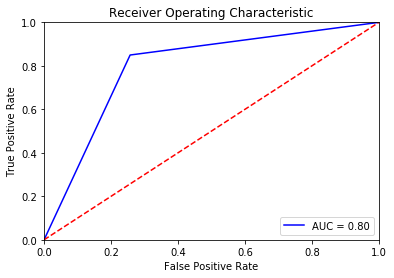

In [131]:
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(Ytest, pred_cnt_lh) #False Positive Rate(fpr), True Positive Rate (tpr)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### The best possible AUC is 1 while the worst is 0.5 (the 45 degrees random line).
#### Any value less than 0.5 means we can simply do the exact opposite of what the model recommends to get the value back above 0.5.